In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Exploratory Data Analysis

In [5]:
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")

In [6]:
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
df.shape

(9879, 40)

In [9]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [11]:
df["whoWins"] = df.blueWins.map({0:"RedWins", 1:"BlueWins"})

In [14]:
df.sample(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWins
410,4454069388,0,41,4,1,7,8,8,0,0,0,0,16604,6.6,17328,203,47,-416,-907,20.3,1660.4,17,6,0,8,7,11,1,1,0,0,17020,7.0,18235,201,55,416,907,20.1,1702.0,RedWins
4532,4505938604,0,16,1,0,8,9,6,0,0,0,0,16972,7.2,19143,198,64,-1832,-386,19.8,1697.2,37,1,1,9,8,10,1,1,0,0,18804,7.4,19529,230,60,1832,386,23.0,1880.4,RedWins
4780,4468006580,0,17,0,0,4,10,10,0,0,0,0,15064,6.2,14203,141,40,-5181,-5072,14.1,1506.4,17,2,1,10,4,9,2,1,1,1,20245,7.4,19275,240,60,5181,5072,24.0,2024.5,RedWins


In [17]:
columns = ["redGoldPerMin", "blueGoldPerMin", "redCSPerMin", "blueCSPerMin"]
df = df.drop(columns,axis=1)

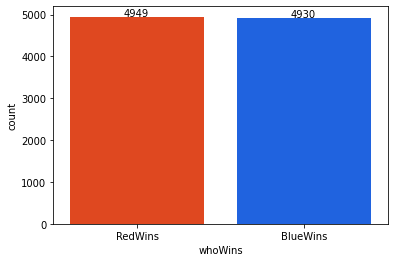

In [25]:
ax=sns.countplot(x=df.whoWins,data=df, palette=['#FF3500',"#0059FF"])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + 0.32, p.get_height() + 10))

In [28]:
df.whoWins.value_counts()

RedWins     4949
BlueWins    4930
Name: whoWins, dtype: int64

In [44]:
print(f'Blue Team has %{round(len(df[df["blueWins"]==1]) / len(df),2) * 100} win rate.')
print("-"*28)
print(f'Red Team has %{round(len(df[df["blueWins"]==0]) / len(df),2) * 100} win rate.')

Blue Team has %50.0 win rate.
----------------------------
Red Team has %50.0 win rate.


#Win Rate When Has a Gold Advantage

In [46]:
palette=['#FF3500',"#0059FF"]

When Blue Team has a gold advantage into the 10 minutes of the game, Blue Team has %72.0 win rate.
When Red Team has a gold advantage into the 10 minutes of the game, Red Team has %72.0 win rate.


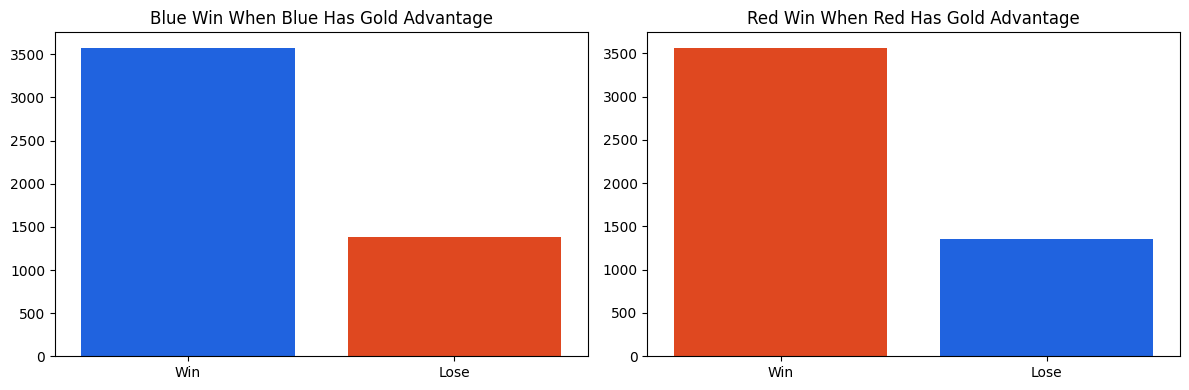

In [69]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=100)
sns.barplot(x=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, y=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[0], palette=palette[::-1])
sns.barplot(x=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().index, y=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().values, ax=ax[1], palette=palette)

ax[0].set_title("Blue Win When Blue Has Gold Advantage")
ax[1].set_title("Red Win When Red Has Gold Advantage")

plt.tight_layout();

print(f'When Blue Team has a gold advantage into the 10 minutes of the game, Blue Team has %{round(len(df[(df["blueGoldDiff"]>0) & (df["blueWins"]==1)]) / len(df[df["blueGoldDiff"]>0]),2) * 100} win rate.')
print(f'When Red Team has a gold advantage into the 10 minutes of the game, Red Team has %{round(len(df[(df["redGoldDiff"]>0) & (df["blueWins"]==0)]) / len(df[df["redGoldDiff"]>0]),2) * 100} win rate.')

#Impact of the First Blood

In [58]:
df["WhoFirstBlood"]=df.blueFirstBlood.map({0:"Red", 1:"Blue"})

When Blue Team got first blood, their win rate is %59.9
When Red Team got first blood, their win rate is %60.28


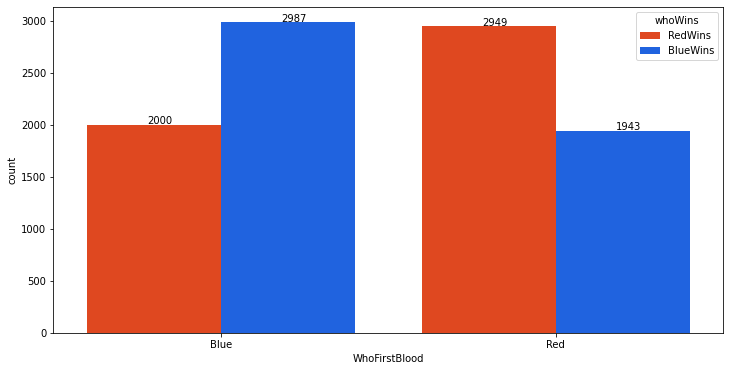

In [67]:
fig, ax = plt.subplots(figsize=(12,6)) 
ax=sns.countplot(x=df.WhoFirstBlood,data=df,hue="whoWins",palette=palette)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + 0.18, p.get_height() + 10));

print(f'When Blue Team got first blood, their win rate is %{round(len(df[(df["blueFirstBlood"]==1) & df["blueWins"]==1]) / len(df[df["blueFirstBlood"]==1]) * 100,2)}')
print(f'When Red Team got first blood, their win rate is %{round(len(df[(df["redFirstBlood"]==1) & (df["blueWins"]==0)]) / len(df[df["redFirstBlood"]==1]) * 100,2)}')

#Dragon

In 9879 games, 4081 times Red Team got dragon. When Red Team got the dragon their win rate is %71.42
In 9879 games, 3576 times Blue Team got dragon. When Blue Team got the dragon their win rate is %64.09
In 9879 games, 2222 times neither team got dragon. In those game both team has %50.0 win rate.


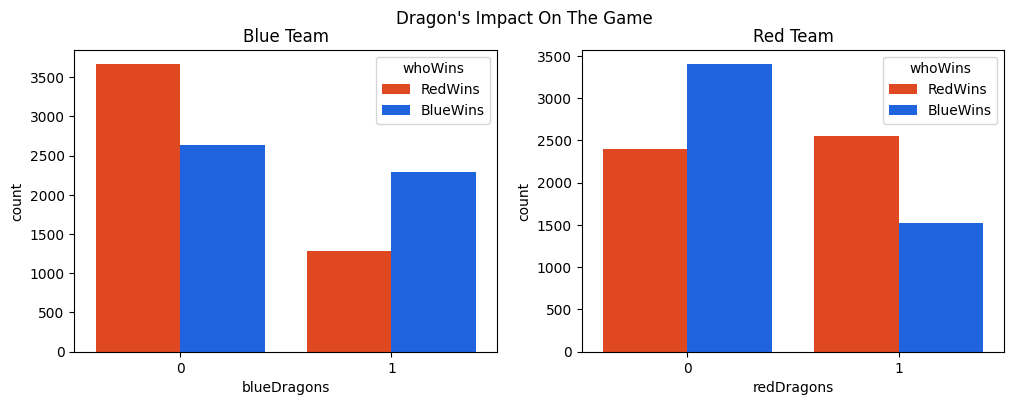

In [80]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=100)
sns.countplot(x="blueDragons",hue="whoWins",data=df,ax=ax[0],palette=palette)
sns.countplot(x="redDragons",hue="whoWins",data=df,ax=ax[1],palette=palette)
plt.suptitle("Dragon's Impact On The Game")
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team");

print(f"In {len(df)} games, {df.redDragons.value_counts()[1]} times Red Team got dragon. When Red Team got the dragon their win rate is %{round(len(df[(df['redDragons'] == 1) & (df['blueWins'] == 0)]) / df.blueDragons.value_counts()[1] * 100,2)}")
print(f"In {len(df)} games, {df.blueDragons.value_counts()[1]} times Blue Team got dragon. When Blue Team got the dragon their win rate is %{round(len(df[(df['blueDragons'] == 1) & (df['blueWins'] == 1)]) / df.blueDragons.value_counts()[1] * 100,2)}")
print(f"In {len(df)} games, {len(df[(df['blueDragons'] == 0) & (df['redDragons'] == 0)])} times neither team got dragon. In those game both team has %{round(len(df[(df['redDragons'] == 0) & (df['blueDragons'] == 0) & (df['blueWins'] == 1)]) / len(df[(df['blueDragons'] == 0) & (df['redDragons'] == 0)]) * 100,2)} win rate.")


#Herald

Out of 9879 games, Blue Team got herald 1857 times. In those games Blue Team's win rate is 59.5.
Out of 9879 games, Red Team got herald 1581 times. In those games Red Team's win rate is 61.23
Out of 9879 games, neither team got herald 6441 times. In those games both team's win rate is 50.0.


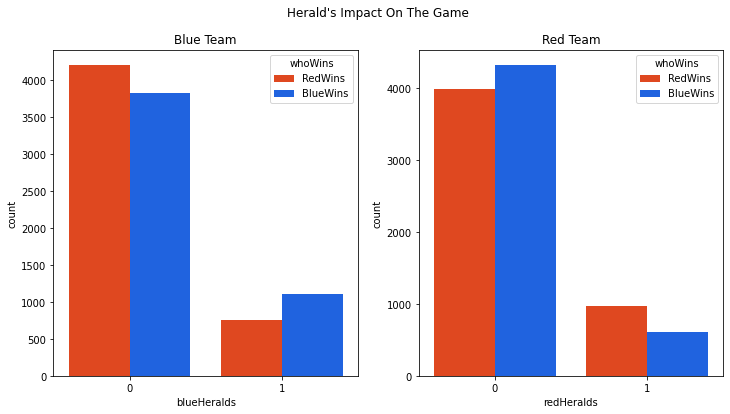

In [87]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.countplot(x="blueHeralds",data=df,hue="whoWins",ax=ax[0],palette=palette)
sns.countplot(x="redHeralds",data=df,hue="whoWins",ax=ax[1],palette=palette)
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")
plt.suptitle("Herald's Impact On The Game");

print(f"Out of {len(df)} games, Blue Team got herald {len(df[(df['blueHeralds'] == 1)])} times. In those games Blue Team's win rate is {round(len(df[(df['blueHeralds'] == 1) & (df['blueWins'] == 1)]) / len(df[(df['blueHeralds'] == 1)]) * 100,2)}.")
print(f"Out of {len(df)} games, Red Team got herald {len(df[(df['redHeralds'] == 1)])} times. In those games Red Team's win rate is {round(len(df[(df['redHeralds'] == 1) & (df['blueWins'] == 0)]) / len(df[(df['redHeralds'] == 1)]) * 100,2)}")
print(f"Out of {len(df)} games, neither team got herald {len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0)])} times. In those games both team's win rate is {round(len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0) & (df['blueWins'] == 1)]) / len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0)]), 2) * 100}.")


#Elite monsters

Out of 9879 games, Blue Team got both herald and dragon for 710 times. In those games Blue Team's win rate is %73.52
Out of 9879 games, Red Team got both herald and dragon for 730 times. In those games Red Team's win rate is %71.37


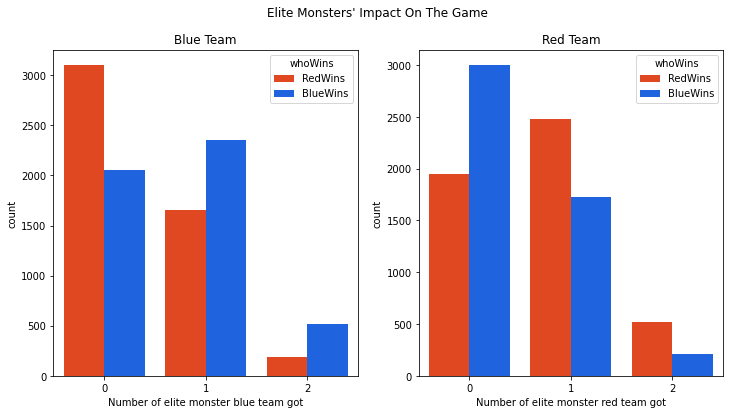

In [90]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.countplot(x="blueEliteMonsters",data=df,hue="whoWins",ax=ax[0],palette=palette)
sns.countplot(x="redEliteMonsters",data=df,hue="whoWins",ax=ax[1],palette=palette)
ax[0].set_title("Blue Team")
ax[0].set_xlabel("Number of elite monster blue team got")
ax[1].set_title("Red Team")
ax[1].set_xlabel("Number of elite monster red team got")

plt.suptitle("Elite Monsters' Impact On The Game");

print(f"Out of {len(df)} games, Blue Team got both herald and dragon for {len(df[df['blueEliteMonsters'] == 2])} times. In those games Blue Team's win rate is %{round(len(df[(df['blueEliteMonsters'] == 2) & (df['blueWins'] == 1)]) / len(df[df['blueEliteMonsters'] == 2]) * 100,2)}")
print(f"Out of {len(df)} games, Red Team got both herald and dragon for {len(df[df['redEliteMonsters'] == 2])} times. In those games Red Team's win rate is %{round(len(df[(df['redEliteMonsters'] == 2) & (df['blueWins'] == 0)]) / len(df[df['redEliteMonsters'] == 2]) * 100,2)}")

In [91]:
print(f"When both teams got no elite monsters, Blue Team's win rate is %{round(len(df[(df['redEliteMonsters'] == 0) & (df['blueEliteMonsters'] == 0) & (df['blueWins'] == 1)]) /len(df[(df['redEliteMonsters'] == 0) & (df['blueEliteMonsters'] == 0)]) * 100,2)}.")

When both teams got no elite monsters, Blue Team's win rate is %50.44.


#Total Minions Killed

When Blue Team wins, their average minion score is 221.62
When Blue Team loses, their average minions score is 211.79
----------------------------------------------------------------------
When Red Team wins, their average minion score is 221.99
When Red Team loses, their average minions score is 212.69


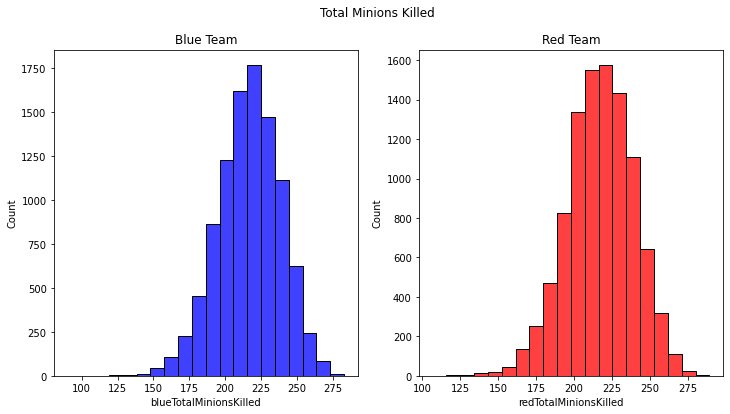

In [101]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.histplot(x="blueTotalMinionsKilled",data=df,ax=ax[0],color="b",bins=20)
sns.histplot(x="redTotalMinionsKilled",data=df,ax=ax[1],color="r",bins=20)
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")
plt.suptitle("Total Minions Killed");

print(f"When Blue Team wins, their average minion score is {round(df[df['blueWins']==1]['blueTotalMinionsKilled'].mean(),2)}")
print(f"When Blue Team loses, their average minions score is {round(df[df['blueWins']==0]['blueTotalMinionsKilled'].mean(),2)}")
print("-"*70)
print(f"When Red Team wins, their average minion score is {round(df[df['blueWins']==0]['redTotalMinionsKilled'].mean(),2)}")
print(f"When Red Team loses, their average minions score is {round(df[df['blueWins']==1]['redTotalMinionsKilled'].mean(),2)}")

#Jungle minions killed

When Blue Team wins, their average jungle minion score is 51.81
When Blue Team loses, their average jungle minion score is 49.21
-----------------------------------------------------------------
When Red Team wins, their average jungle minion score is 52.42
When Red Team loses, their average jungle minion score is 50.2


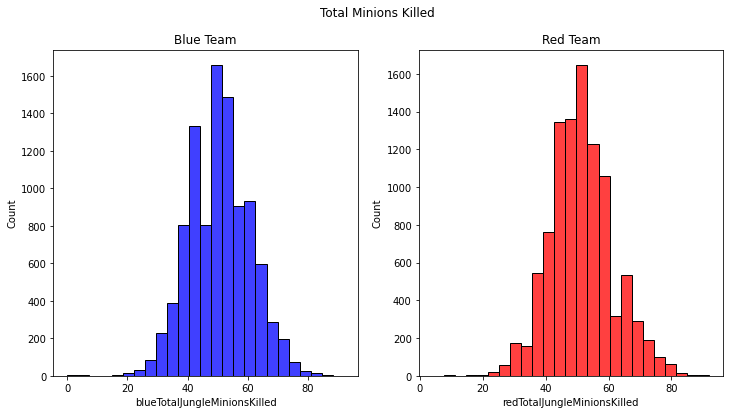

In [105]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.histplot(x="blueTotalJungleMinionsKilled",data=df,ax=ax[0],color="b",bins=25)
sns.histplot(x="redTotalJungleMinionsKilled",data=df,ax=ax[1],color="r",bins=25)
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")
plt.suptitle("Total Minions Killed");

print(f'When Blue Team wins, their average jungle minion score is {round(df[df["blueWins"]==1]["blueTotalJungleMinionsKilled"].mean(),2)}')
print(f'When Blue Team loses, their average jungle minion score is {round(df[df["blueWins"]==0]["blueTotalJungleMinionsKilled"].mean(),2)}')
print("-"*65)
print(f'When Red Team wins, their average jungle minion score is {round(df[df["blueWins"]==0]["redTotalJungleMinionsKilled"].mean(),2)}')
print(f'When Red Team loses, their average jungle minion score is {round(df[df["blueWins"]==1]["redTotalJungleMinionsKilled"].mean(),2)}')

#Experience

When Blue Team wins, their average total experince is 18404.58
When Blue Team loses, their average total experince is 17453.47
----------------------------------------------------------------------
When Red Team wins, their average total experince is 18425.37
When Red Team loses, their average total experince is 17496.3


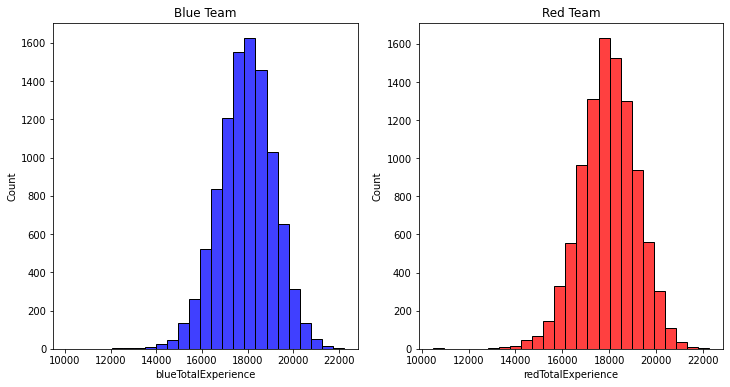

In [110]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.histplot(x="blueTotalExperience",data=df,ax=ax[0],color="b",bins=25)
sns.histplot(x="redTotalExperience",data=df,ax=ax[1],color="r",bins=25)
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team");

print(f'When Blue Team wins, their average total experince is {round(df[df["blueWins"] == 1].blueTotalExperience.mean(),2)}')
print(f'When Blue Team loses, their average total experince is {round(df[df["blueWins"] == 0].blueTotalExperience.mean(),2)}')
print("-"*70)
print(f'When Red Team wins, their average total experince is {round(df[df["blueWins"] == 0].redTotalExperience.mean(),2)}')
print(f'When Red Team loses, their average total experince is {round(df[df["blueWins"] == 1].redTotalExperience.mean(),2)}')

#Average Level

In [111]:
print(f'When Blue Team wins, their average level is {round(df[df["blueWins"]==1].blueAvgLevel.mean(),2)}')
print(f'When Blue Team loses, their average level is {round(df[df["blueWins"]==0].blueAvgLevel.mean(),2)}')
print("-"*50)
print(f'When Red Team wins, their average level is {round(df[df["blueWins"]==0].redAvgLevel.mean(),2)}')
print(f'When Red Team loses, their average level is {round(df[df["blueWins"]==1].redAvgLevel.mean(),2)}')

When Blue Team wins, their average level is 7.03
When Blue Team loses, their average level is 6.81
--------------------------------------------------
When Red Team wins, their average level is 7.03
When Red Team loses, their average level is 6.82


#Wards

When Blue Team wins, their average ward score is 22.29
When Blue Team loses, their average ward score is 22.29
------------------------------------------------------------
When Red Team wins, their average ward score is 22.80
When Red Team loses, their average ward score is 21.93
------------------------------------------------------------
When Blue Team wins, they destroyed 2.92 wards per game.
When Red Team wins, they destroyed 2.84 wards per game.


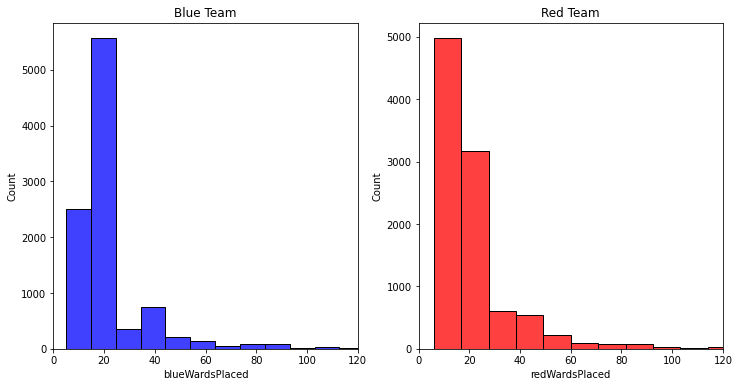

In [118]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
sns.histplot(x="blueWardsPlaced",data=df,ax=ax[0],color="b",bins=25)
sns.histplot(x="redWardsPlaced",data=df,ax=ax[1],color="r",bins=25)
ax[0].set_xlim(0,120)
ax[1].set_xlim(0,120)
ax[0].set_title("Blue Team")
ax[1].set_title("Red Team");

print(f"When Blue Team wins, their average ward score is {round(df[df['blueWins'] == 1]['blueWardsPlaced'].mean(),2)}")
print(f"When Blue Team loses, their average ward score is {round(df[df['blueWins'] == 0]['blueWardsPlaced'].mean(),2)}")
print("-"*60)
print(f'When Red Team wins, their average ward score is {round(df[df["blueWins"] == 0]["redWardsPlaced"].mean(),2)}0')
print(f'When Red Team loses, their average ward score is {round(df[df["blueWins"] == 1]["redWardsPlaced"].mean(),2)}')

When Blue Team wins, they destroyed 2.92 wards per game.
When Red Team wins, they destroyed 2.84 wards per game.


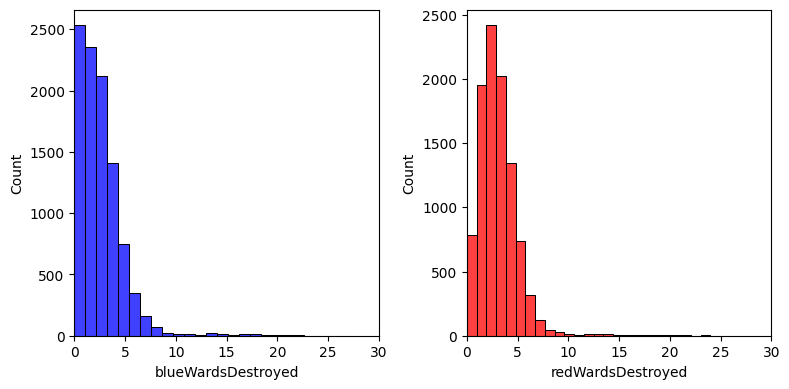

In [121]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=100)

sns.histplot(data=df, x="blueWardsDestroyed", bins=25, ax=ax[0], color="b")
ax[0].set_xlim(0,30)

sns.histplot(data=df, x="redWardsDestroyed", bins=25, ax=ax[1], color="r")
ax[1].set_xlim(0,30)
plt.tight_layout()

print(f'When Blue Team wins, they destroyed {round(df[df["blueWins"] == 1]["blueWardsDestroyed"].mean(),2)} wards per game.')
print(f'When Red Team wins, they destroyed {round(df[df["blueWins"] == 0]["redWardsDestroyed"].mean(),2)} wards per game.')

#Kills

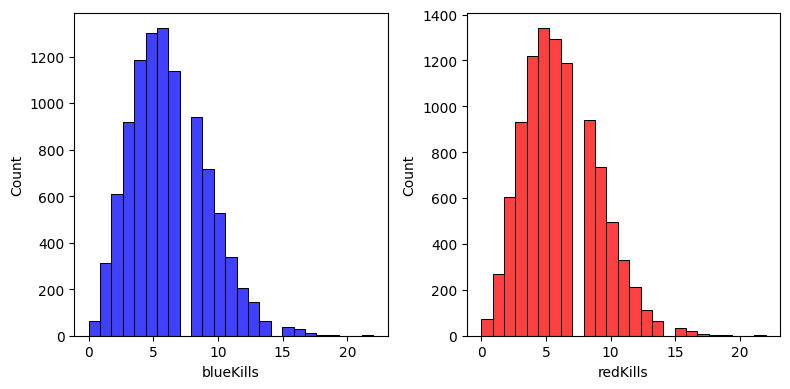

In [122]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=100)

sns.histplot(data=df, x="blueKills", bins=25, ax=ax[0], color="b")

sns.histplot(data=df, x="redKills", bins=25, ax=ax[1], color="r")
plt.tight_layout()

#Correlation

In [136]:
df.corr()["blueWins"].sort_values(ascending=False).drop("blueWins")

blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMinionsKilled    -0.110994
redFirstBlood                  -0.201769
redDragons      

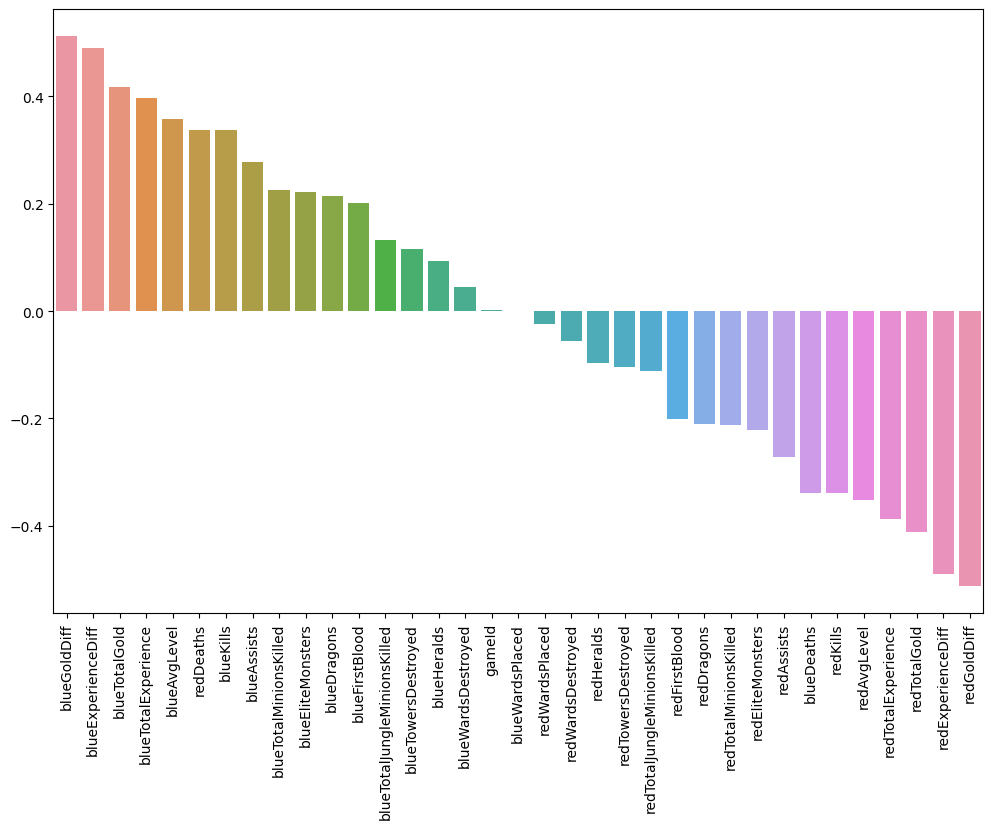

In [139]:
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(x=df.corr()["blueWins"].sort_values(ascending=False).drop("blueWins").index, y=df.corr()["blueWins"].sort_values(ascending=False).drop("blueWins").values)
plt.xticks(rotation=90);